In [50]:
import pandas as pd

In [51]:
data=pd.read_csv("SolarPrediction.csv")

<Axes: xlabel='Radiation', ylabel='Humidity'>

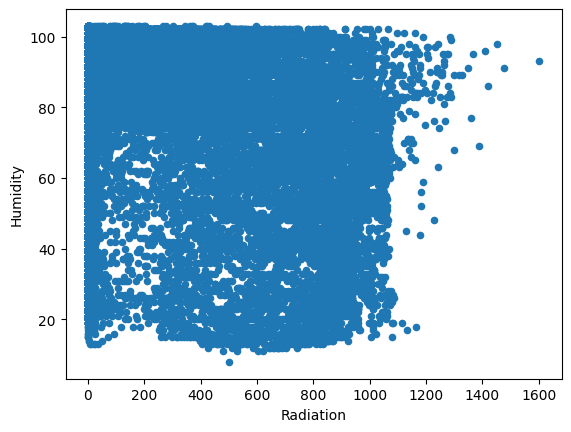

In [52]:
#A1
data.plot.scatter(x='Radiation',y='Humidity')

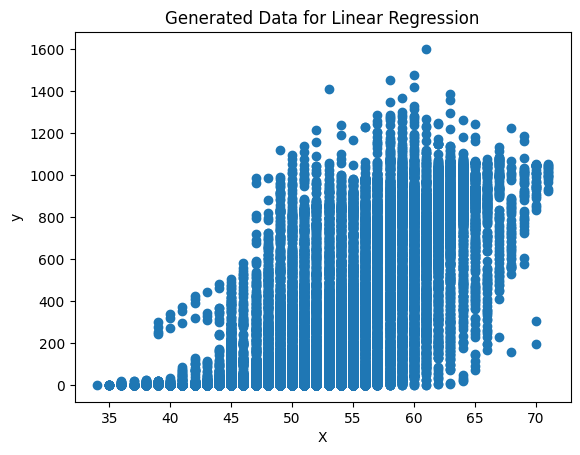

Coefficients: [[37.42185587]]
Intercept: [-1704.3940977]
Predicted y_test for X_test: [[503.4953989 ]
 [503.4953989 ]
 [ 54.43312841]
 ...
 [204.1205519 ]
 [ 54.43312841]
 [466.07354303]]


In [53]:
#A2
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data['Temperature'].values.reshape(-1, 1)                      
y = data['Radiation'].values.reshape(-1, 1) 

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data for Linear Regression")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

predicted_y = model.predict(X_test)
print(f'Predicted y_test for X_test: {predicted_y}')


In [58]:
#A4
data['Radiation_Class']=  pd.cut(data['Radiation'], 
                                 bins=[0, 800,  1610], labels=[0, 1])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
 
data['Radiation_Class'] = data['Radiation_Class'].astype(int)  

X= data.iloc[:,4:9]
y=data['Radiation_Class'].iloc[:]

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")


print(f"Coefficients: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Accuracy of the logistic regression model: 0.9194811551639746
Coefficients: [[ 2.25625124 -0.08007578  0.22279333 -0.06567592  0.30101663]]
Intercept: [-3.9009415]
Root Mean Squared Error: 0.283758426898701


In [57]:
#A5
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

X = data['Temperature'].values.reshape(-1, 1)                      
y = data['Radiation'].values.reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)

predicted_y_tree = reg_tree.predict(X_test)
print(f'Predicted y_test for X_test (Regression Tree): {predicted_y_tree}')
print(f"Accuracy of the DecisionTreeRegressor model: {reg_tree.score(X_test, y_test)}")
rmse = sqrt(mean_squared_error(y_test, predicted_y_tree))
print(f'Root Mean Squared Error: {rmse}')

knn_regressor = KNeighborsRegressor(n_neighbors=5)   
knn_regressor.fit(X_train, y_train)

predicted_y_knn = knn_regressor.predict(X_test)
print(f'Predicted y_test for X_test (k-NN Regressor): {predicted_y_knn}')
print(f"Accuracy of the KNeighborsRegressor model: {knn_regressor.score(X_test, y_test)}")

rmse = sqrt(mean_squared_error(y_test, predicted_y_knn))
print(f'Root Mean Squared Error: {rmse}')


Predicted y_test for X_test (Regression Tree): [570.31515068 570.31515068  23.1226147  ... 118.87142579  23.1226147
 539.76564792]
Accuracy of the DecisionTreeRegressor model: 0.6031736270948931
Root Mean Squared Error: 198.55334240894047
Predicted y_test for X_test (k-NN Regressor): [[705.13 ]
 [705.13 ]
 [ 19.356]
 ...
 [274.612]
 [ 19.356]
 [695.66 ]]
Accuracy of the KNeighborsRegressor model: 0.5069128014337598
Root Mean Squared Error: 221.329244904365
